# 1. Image Processing

In [1]:
cd downloads

/Users/jameslee/Downloads


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# convert color image to grayscale
def rgb_to_grayscale(im):
    return np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])
# load the image
path_to_image = 'pexels-ollivves-1433052.jpg' 
color_image = Image.open(path_to_image)
color_image_np = np.array(color_image)
# convert to grayscale
gray_image = rgb_to_grayscale(color_image_np)

Image is an array, or a matrix, of square pixels (picture elements) arranged in columns and rows. For an image to turn 90 degrees clockwise and counterclockwise, we would have to do the same thing to the array of pixels and the function numpy.rot90() does the job.

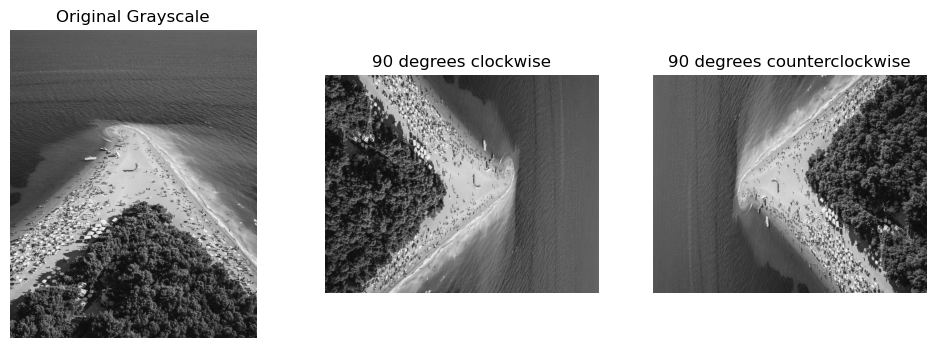

In [ ]:
# numpy.rot90() function is used to rotate an array by 90 degrees
def flip_90_clock(image):
    # k=-1 rotates the array 90 degrees clockwise.
    return np.rot90(image, -1)
    
def flip_90_counter_clock(image):
    # k=1 (or simply np.rot90(image)) rotates the array 90 degrees counterclockwise
    return np.rot90(image, 1)

clock = flip_90_clock(gray_image)
counterclock = flip_90_counter_clock(gray_image)
# plotting the results
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale')
axes[0].axis('off')
axes[1].imshow(clock, cmap='gray')
axes[1].set_title('90 degrees clockwise')
axes[1].axis('off')
axes[2].imshow(counterclock, cmap='gray')
axes[2].set_title('90 degrees counterclockwise')
axes[2].axis('off')
plt.show()

# 2. Polynomial function

## Read the test2.csv file

The dataset is loaded from a CSV file into a Pandas DataFrame.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
test2 = pd.read_csv('test2.csv')
pd.set_option('display.max_rows', None)

In [6]:
test2

,X,Y
0,0.000000,0.049671
1,0.008403,-0.030560
2,0.016807,0.031461
3,0.025210,0.102594
4,0.033613,-0.089335
5,0.042017,-0.105342
6,0.050420,0.060201
7,0.058824,-0.036542
8,0.067227,-0.175560
9,0.075630,-0.089436


##  Split the data into a training set and a testing set

The dataset X represents the independent variable and Y the dependent variable. Cross validation is used where 80% of the data used for training and 20% for testing to avoid overfitting problems.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(test2['X'].values.reshape(-1, 1), 
                                                    test2['Y'], test_size=0.2,random_state=0)


# variable to track the best model
mse_list = {}


## Loop that tries polynomial models of different degrees and fitting the training data (with evaluation)

A loop iterates through polynomial degrees from 1 to 10. For each degree, PolynomialFeatures from sklearn is used to transform the original features into polynomial features.

A linear regression model is fitted using the polynomial features because it's a widely used method for regression tasks and works well with polynomial features.

The model predicts the Y values for the testing set and evaluates these predictions by computing the mean squared error (MSE) against the actual Y values. MSE quantifies the average squared difference between predicted and actual values, providing a measure of model accuracy.

In [ ]:
for degree in range(1, 11):
    # generate polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    
    # A LinearRegression model from sklearn.linear_model is fitted using the polynomial features. 
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # predict on the testing set
    y_pred = model.predict(X_poly_test)
    
    # calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_list[degree] = mse


## Plot each model using the mean squared error (MSE)

After evaluating all the models, the degree that results in the lowest MSE is selected as the optimal polynomial degree. This degree best fits the training data well while also works effectively to new data.

The MSEs for different polynomial degrees are plotted. This visual representation helps in quickly identifying the model that minimizes the MSE.

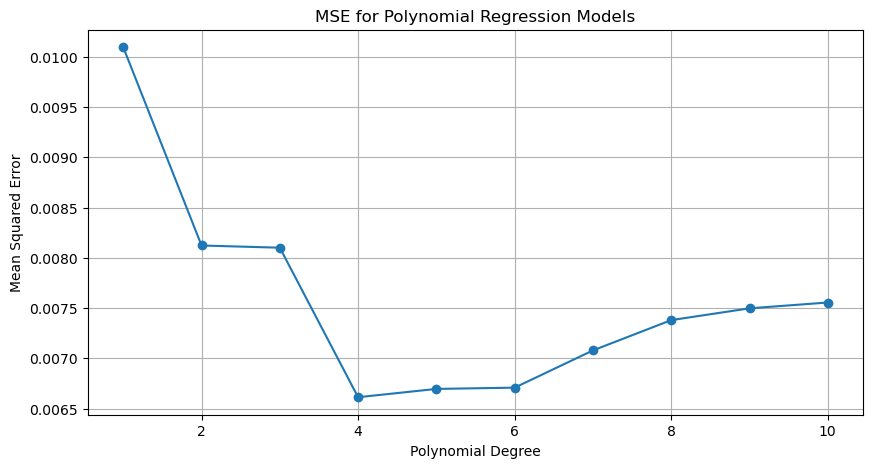

Optimal degree: 4
MSE: 0.006613641636612678


In [ ]:
# MSE for each degree
plt.figure(figsize=(10, 5))
plt.plot(list(mse_list.keys()), list(mse_list.values()), marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE for Polynomial Regression Models')
plt.grid(True)
plt.show()

# the degree with the lowest MSE
optimal_degree = min(mse_list, key=mse_list.get)
print('Optimal degree: ' + str(optimal_degree))
print('MSE: ' + str(mse_list[optimal_degree]))

## Analysis of Results

The plot shows the Mean Squared Error (MSE) for polynomial regression models of degrees from 1 to 10. We observe that the MSE generally decreases as the polynomial degree goes up by 4, but slightly increases after 4. Degree 4 has a MSE of approximately 0.0066 which is the lowest indicating that that this degree has the best fit and avoids overfitting, which can occur with higher degrees. The increase in MSE for degrees higher than 4 does not result in better prediction accuracy on the testing set.

# 3. The Wine Data Analysis

## Load the Wine dataset

Using load_wine from sklearn.datasets to access the Wine dataset

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_wine()
X = data.data
y = data.target

## Split the dataset into training and testing sets

Dataset is divided into 70% training and 30% testing using train_test_split from sklearn.model_selection. This split ensures that the model can avoid overfitting

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Normalize the data

Given that k-NN uses distance calculations to determine the nearest neighbors, it is important to scale the features. StandardScaler from sklearn.preprocessing was utilized to standardize the features by removing the mean and scaling to unit variance.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# this step is crucial as k-NN performance is greatly affected by the scale of the features, due to its reliance on the distance between data points.

## Implement the k-NN classifier using scikit-learn

KNeighborsClassifier from sklearn.neighbors was used to train the k-NN model. We iterated over different values of k from 1 to 20 to observe how the number of neighbors affects the performance.

The performance of the classifier was evaluated using accuracy_score from sklearn.metrics. Accuracy is a suitable metric when interpreting model's performance.

In [ ]:
# experiment with different values of k (from 1 to 20)
accuracies = {}

neighbor_range = range(1, 21)  

for k in neighbor_range:
    # k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # predict
    y_pred = knn.predict(X_test)
    
    # evaluate
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[k] = accuracy

## Evaluating the classifier performance and plotting it

We experimented with values of k from 1 to 20 and plotted the relationship between K and accuracy score. Matplotlib.pyplot was used to visualize the optimal value of k that yields the highest accuracy.

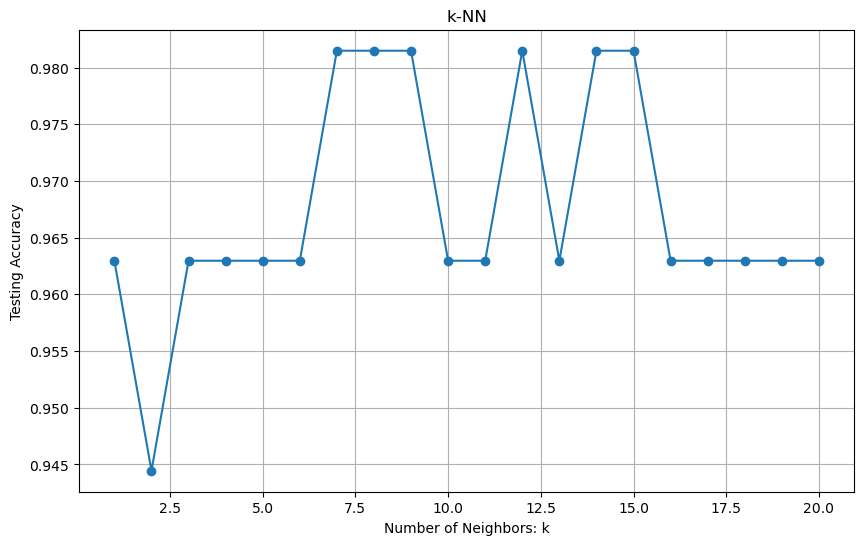

In [ ]:
# relationship between k and accuracy score
plt.figure(figsize=(10, 6))
plt.plot(neighbor_range, list(accuracies.values()), marker='o')
plt.title('k-NN')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('accuracy score')
plt.grid(True)
plt.show()

In [ ]:
# identify the k that gives the highest accuracy.
optimal_degree = max(accuracies, key=accuracies.get)
print('Optimal Degree: ' + str(optimal_degree))
print('Accuracy: ' + str(accuracies[optimal_degree]))

Optimal Degree: 7
Accuracy: 0.9814814814814815


## Analysis of Results

The best accuracy achieved was 0.98 with k values at 7, 8, 9, 12, 14, and 15. The first occurrence of this peak where k=7 suggests that this is a suitable choice considering the balance between model simplicity and predictive performance. With k set to 7, this model could be used effectively for classifying the wine cultivars based on the given chemical attributes.

## The effect of k on the classification performance

The model's performance varied with different values of k. Lower k values showed slightly lower accuracy, indicating weaknessness to noise and overfitting whereas as k increased, the model became slightly more stable with higher accuracy. However, further increasing k did not significantly improve accuracy and lead to problems such as underfitting so adding more neighbors beyond a certain point does not perform better.

# 4. The Wholesale Customers Data Analysis

## Load the Wholesale Customers dataset

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Load and preprocess the data
wholesale = pd.read_csv('Wholesale customers data.csv')


## Inspect the Dataset

In [17]:
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
wholesale.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Handling missing values

In [19]:
wholesale.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

#### Dataset Overview
The dataset consists of 440 entries and 8 columns.
There are no missing values across all columns.
The columns include 'Channel', 'Region', and various spending categories such as 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen'.

## Normalization and removing irrelevant features

Normalize the data since clustering is a methods based on measures of how far apart data points are. By scaling the data, we prevent variables with larger scales from dominating the distance calculations, which could lead to biased clusters.

In [ ]:
from sklearn.preprocessing import StandardScaler

# drop Channel and Region columns + normalize the data
scaler = StandardScaler()
wholesale_scaled = StandardScaler().fit_transform(wholesale.drop(['Channel', 'Region'], axis=1))

new_wholesale = pd.DataFrame(wholesale_scaled, columns=wholesale.drop(['Channel', 'Region'], axis=1).columns)
new_wholesale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## EDA

EDA helps identify patterns, outliers, and the underlying structure of the data

### Distribution of Variables

Looking at the histograms for each spending category to understand the distribution.

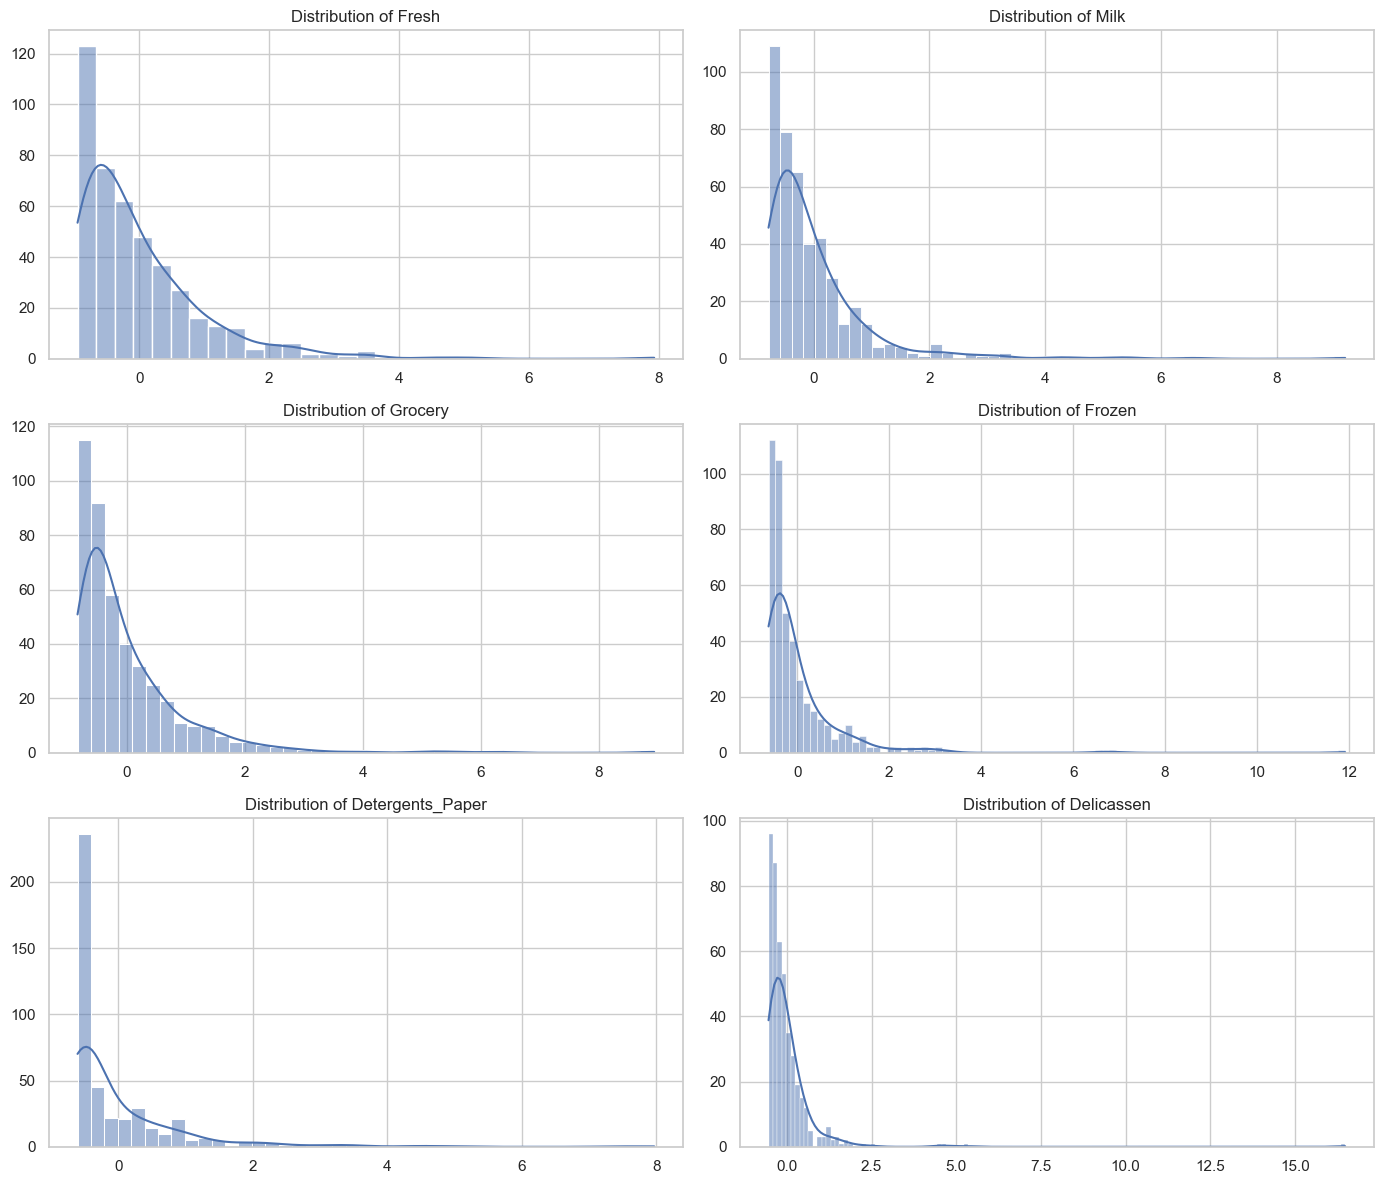

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(new_wholesale.columns):
    sns.histplot(new_wholesale[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


The histograms show that the distributions of all categories are right-skewed, indicating that most customers have low spending in these categories with a few outliers showing very high spending.

### Correlation Heatmap 

It is used to explore relationships between different variables.

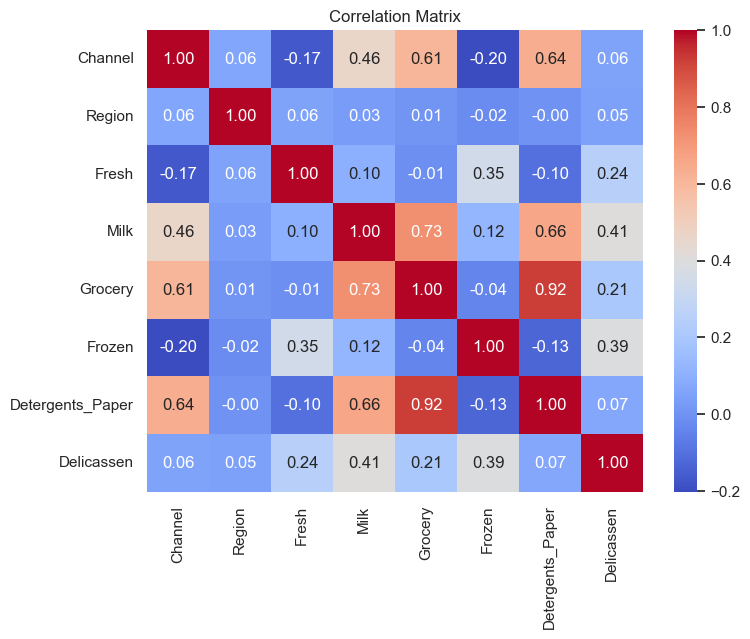

In [ ]:
# heatmap to visualize the correlations between variables
plt.figure(figsize=(8, 6))
sns.heatmap(wholesale.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Grocery and Detergents_Paper show a very strong positive correlation (0.92).
Milk shows positive correlations with Grocery (0.73) and Detergents_Paper (0.66).

## Clustering Implementation and plotting the Elbow Method

Elbow Method is used to identify the most appropriate number of clusters by evaluating the sum of squared distances from each point to its assigned center for a range of cluster numbers.

/Users/jameslee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

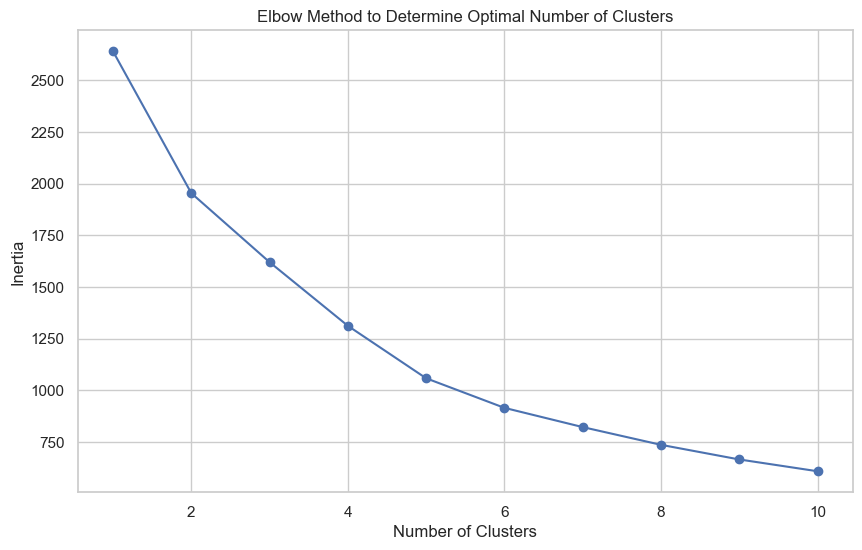

In [ ]:
from sklearn.cluster import KMeans

# determine the optimal number of clusters using the Elbow Method
inertia_values = []
cluster_range = range(1, 11) 

for k in range(1,11):
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit(new_wholesale)
    inertia_values.append(kmeans_model.inertia_)

# elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


The plot of the Elbow Method shows the inertia for different numbers of clusters. The elbow point, where the decrease in inertia starts to level off, indicates the optimal number of clusters.
Given this, k=5 seems like a good choice for the number of clusters because beyond this point because after 5, the reduction in inertia decreases and the slope gets less steeper.

In [ ]:
# implement k-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=0)
cluster_labels = kmeans.fit_predict(wholesale_scaled)

# attach cluster labels to the original data
wholesale['Cluster'] = cluster_labels

/Users/jameslee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Cluster Analysis

After clustering, the cluster labels were attached back to the unscaled original data. The mean spending in each product category was calculated for each cluster to analyze and compare their characteristics.

In [ ]:
# summary of each cluster
cluster_summary = wholesale.groupby('Cluster').mean()
print(cluster_summary)

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.137037  2.518519   9092.155556   2967.759259   3807.411111   
1        2.000000  2.500000  15964.900000  34708.500000  48536.900000   
2        1.000000  3.000000  36847.000000  43950.000000  20170.000000   
3        1.126984  2.682540  32957.984127   4997.349206   5884.761905   
4        1.906250  2.520833   5754.166667  10866.604167  16607.104167   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         2271.759259        989.814815    978.962963  
1         3054.600000      24875.200000   2942.800000  
2        36534.000000        239.000000  47943.000000  
3         8422.841270        954.603175   2462.968254  
4         1464.125000       7202.875000   1813.385417  


Cluster 0 \
This cluster seems to have relatively higher spending on Fresh products compared to other categories.
Lower average spending on Detergents_Paper and Delicassen might indicate small restaurants or cafes.

Cluster 1 \
This cluster shows extremely high spending in Grocery, Detergents_Paper, and Fresh products. These are likely to be large grocery stores or supermarkets.

Cluster 2 \
This cluster features high spending in all categories except Detergents_Paper. It is assumed to be a very large restaurant like a food chain.

Cluster 3 \
This cluster seems to focus heavily on Fresh products like cluster 0 but with higher volumes, suggesting these could be medium to large sized restaurnts or cafes.

Cluster 4 \
This cluster has high average spending on Milk, Grocery, and Detergents_Paper, similar to Cluster 1 but with lower volumes. It likely to be medium size grocery stores or supermarkets or smaller scale than cluster 1

#### Summary
Each cluster represents different segments of the wholesale market: 

Clusters 0 and 3 are focused more on fresh products, likely including businesses that require a steady supply of fresh ingredients to prepare meals. Cluster 3 might operate at a bigger scale based on the volumes.

Clusters 1 and 4 are similar in their high expenditure on grocery and Detergents_Paper, suited for supermarkets, but Cluster 1 operates at a larger scale.

Cluster 2 is unique with its high expenditure across all categories except Detergents_Paper, indicating very large-scale restaurants/food chains.